# Getting Started with Edcrop


In [22]:
import importlib.util
 
# specify the module that needs to be 
# imported relative to the path of the 
# module
spec=importlib.util.spec_from_file_location("edcrop", r"C:\Users\au701230\WPy64-31090\python-3.10.9.amd64\Lib\site-packages\edcrop\edcrop.py")
 
# creates a new module based on spec
foo = importlib.util.module_from_spec(spec)
 
# executes the module in its own namespace
# when a module is imported or reloaded.
spec.loader.exec_module(foo)


import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

wdir = os.path.join(os.getcwd())

os.chdir(wdir)

yaml = os.path.join(wdir, 'yaml_files/default.yaml')

foo.run_model(yaml=yaml)

Read input file C:\Users\au701230\OneDrive - Aarhus Universitet\Documents\Projects\edcrop\edcrop\yaml_files/default.yaml.

Loop through simulations.

 Climate data file: C:\Users\au701230\OneDrive - Aarhus Universitet\Documents\Projects\edcrop\edcrop\data\Weatherdata_S1.edcrop_wf.

 Soil parameter values:  use default.

 Crop parameter values:  use default.

 Model parameter values:  update from input file.
  ed:
    plotseries: false
    prlistd: Date T P Ep I Ea Dsum Db Dmp
    prlisty: P Ep I Ea Dsum Db Dmp
    wbfunc: ed
    
===> Run Station1_JB1_WW_ed


 Model parameter values:  update from input file.
  Evacrop:
    plotseries: false
    prlistd: Date T P Ep I Ea Dsum Db Dmp Ve Vr Vb
    prlisty: P Ep I Ea Dsum Db Dmp Ve Vr Vb
    wbfunc: evacrop
    
===> Run Station1_JB1_WW_Evacrop


 Soil parameter values:  update from input file.
  JB7:
    Cmp: 0.10168858
    Kmp: 10.0
    

 Crop parameter values:  use default.

 Model parameter values:  update from input file.
  ed:
    p

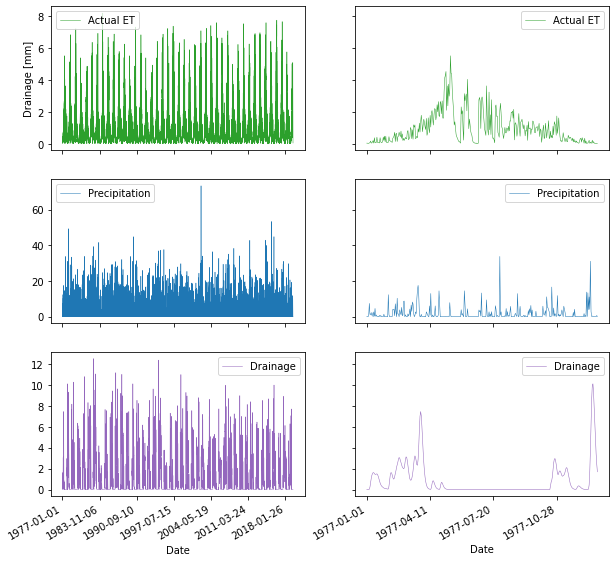

In [24]:
df = pd.read_csv('Station1_JB1_WW_ed_wb.out')
df.columns = df.columns.str.replace(' ', '')

df_sub = df.iloc[0:365,:]

fig, axs = plt.subplots(3,2, sharex = 'col', sharey='row', figsize=(10,10))

df.plot.line(x='Date', y='Ea', ax=axs[0,0], c='C2', label='Actual ET', lw=0.5)
df.plot.line(x='Date', y='P', ax=axs[1,0], c='C0', label='Precipitation', lw=0.5)
df.plot.line(x='Date', y='Dsum', ax=axs[2,0], c='C4', label='Drainage', lw=0.5)


df_sub.plot.line(x='Date', y='Ea', ax=axs[0,1], c='C2', label='Actual ET', lw=0.5)
df_sub.plot.line(x='Date', y='P', ax=axs[1,1], c='C0', label='Precipitation', lw=0.5)
df_sub.plot.line(x='Date', y='Dsum', ax=axs[2,1], c='C4', label='Drainage', lw=0.5)

axs[0,0].set_ylabel('Drainage [mm]')

fig.autofmt_xdate()